# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [2]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [3]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print ( xs,'\n')
print ("xs indexes:",xs.index,'\n')
# Values of the Series are actually a numpy array
print ("xs values:", xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n')
print (xs[['d', 'f', 'h']], '\n')
print (type(xs[['d', 'f', 'h']]), '\n')

a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

xs indexes: Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

xs values: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 

<class 'pandas.core.series.Series'> 



In [6]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n') #mask
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [7]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)



b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without considering whether the Series involved have the same labels.

In [ ]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
print(s)
s = s[1:] + s[:-1] #operations occur only between values with same label
print(s)

a   -0.483041
b   -0.110074
c    1.147385
d   -0.743951
e    2.000637
dtype: float64
a         NaN
b   -0.220148
c    2.294770
d   -1.487901
e         NaN
dtype: float64


### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas has a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [ ]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
print(date)

date = dt.datetime(2024,11,27,10,45,10,15) #Declare a new date
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 27 2024'
# or alternatively
date = '27/11/2024 10:45:00'
print (date)

days = pd.date_range(date, periods=7, freq='D')
print (days)

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)


2024-11-27
2024-11-27 10:45:10.000015
27/11/2024 10:45:00
DatetimeIndex(['2024-11-27 10:45:00', '2024-11-28 10:45:00',
               '2024-11-29 10:45:00', '2024-11-30 10:45:00',
               '2024-12-01 10:45:00', '2024-12-02 10:45:00',
               '2024-12-03 10:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2024-11-27 10:45:00', '2024-11-27 10:45:01',
               '2024-11-27 10:45:02', '2024-11-27 10:45:03',
               '2024-11-27 10:45:04', '2024-11-27 10:45:05',
               '2024-11-27 10:45:06', '2024-11-27 10:45:07',
               '2024-11-27 10:45:08', '2024-11-27 10:45:09',
               ...
               '2024-11-27 11:44:50', '2024-11-27 11:44:51',
               '2024-11-27 11:44:52', '2024-11-27 11:44:53',
               '2024-11-27 11:44:54', '2024-11-27 11:44:55',
               '2024-11-27 11:44:56', '2024-11-27 11:44:57',
               '2024-11-27 11:44:58', '2024-11-27 11:44:59'],
              dtype='datetime64[ns]', leng

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset.

Timestamp is the pandas equivalent of python’s Datetime and is interchangeable with it in most cases. 

In [10]:
tstamp = pd.Timestamp(dt.datetime(2020, 11, 9))

# internally it counts the nanoseconds from January 1st 19
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
ts = pd.to_datetime('2010/11/12', format='%Y/%m/%d')
print (type(ts))
print (ts.value)
ts = pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')
print (ts)
print (ts.value)



1604880000000000000
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1289520000000000000
2010-11-12 00:00:00
1289520000000000000


A standard series can be created and (range of) elements can be used as indexes

In [11]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2024-11-27':'2024-12-03'], '\n') # Note - includes end time


2024-11-27 10:45:00    10.775838
2024-11-28 10:45:00    10.774475
2024-11-29 10:45:00    11.433930
2024-11-30 10:45:00     9.447183
Freq: D, dtype: float64 

2024-11-27 10:45:00    10.775838
2024-11-28 10:45:00    10.774475
2024-11-29 10:45:00    11.433930
2024-11-30 10:45:00     9.447183
2024-12-01 10:45:00     8.233999
2024-12-02 10:45:00     8.495604
2024-12-03 10:45:00     9.461674
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [ ]:
pd.to_datetime([1, 2, 3, 4], unit='D', origin=pd.Timestamp('1980-02-03'))

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [14]:
entries=10
dates=pd.date_range('11/27/2024 10:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
df


,A,B,C,D
2024-11-27 10:45:00,1.215237,-0.253041,2.079004,1.115711
2024-11-27 11:45:00,0.498972,1.356122,1.476240,-0.430860
2024-11-27 12:45:00,-1.299732,0.248846,-0.251089,0.921080
2024-11-27 13:45:00,-1.738455,0.078341,1.235445,1.479822
2024-11-27 14:45:00,1.675864,0.022991,-1.522376,1.367893
2024-11-27 15:45:00,0.766058,1.732268,-0.480677,-0.370051
2024-11-27 16:45:00,1.917604,-0.269768,0.488232,-0.704279
2024-11-27 17:45:00,0.032161,-0.892695,-0.924566,0.281468
2024-11-27 18:45:00,1.264089,-0.496770,-0.536681,-1.292458
2024-11-27 19:45:00,0.603497,1.218552,1.306666,-2.925193


or by means of a dictionary:


In [ ]:
df2 = pd.DataFrame( # A pandas dataframe is an array of data series
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
df2

# check what happens if D and E had different lenghts 

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [16]:
df.head(2)

,A,B,C,D
2024-11-27 10:45:00,1.215237,-0.253041,2.079004,1.115711
2024-11-27 11:45:00,0.498972,1.356122,1.476240,-0.430860


In [17]:
df.tail(4)

,A,B,C,D
2024-11-27 16:45:00,1.917604,-0.269768,0.488232,-0.704279
2024-11-27 17:45:00,0.032161,-0.892695,-0.924566,0.281468
2024-11-27 18:45:00,1.264089,-0.496770,-0.536681,-1.292458
2024-11-27 19:45:00,0.603497,1.218552,1.306666,-2.925193


In [18]:
df.index

DatetimeIndex(['2024-11-27 10:45:00', '2024-11-27 11:45:00',
               '2024-11-27 12:45:00', '2024-11-27 13:45:00',
               '2024-11-27 14:45:00', '2024-11-27 15:45:00',
               '2024-11-27 16:45:00', '2024-11-27 17:45:00',
               '2024-11-27 18:45:00', '2024-11-27 19:45:00'],
              dtype='datetime64[ns]', freq='h')

In [19]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [20]:
df.values

array([[ 1.21523669, -0.2530413 ,  2.07900413,  1.11571114],
       [ 0.49897167,  1.3561223 ,  1.47623962, -0.43086027],
       [-1.29973156,  0.24884602, -0.25108862,  0.92107954],
       [-1.73845519,  0.07834145,  1.23544543,  1.47982244],
       [ 1.67586439,  0.02299101, -1.5223756 ,  1.36789252],
       [ 0.76605793,  1.73226824, -0.48067732, -0.37005053],
       [ 1.91760389, -0.26976848,  0.4882322 , -0.70427861],
       [ 0.03216098, -0.89269487, -0.92456639,  0.28146794],
       [ 1.26408914, -0.49677015, -0.53668146, -1.29245791],
       [ 0.60349694,  1.21855208,  1.30666558, -2.92519262]])

In [ ]:
df.describe()

In [23]:
df

,A,B,C,D
2024-11-27 10:45:00,1.215237,-0.253041,2.079004,1.115711
2024-11-27 11:45:00,0.498972,1.356122,1.476240,-0.430860
2024-11-27 12:45:00,-1.299732,0.248846,-0.251089,0.921080
2024-11-27 13:45:00,-1.738455,0.078341,1.235445,1.479822
2024-11-27 14:45:00,1.675864,0.022991,-1.522376,1.367893
2024-11-27 15:45:00,0.766058,1.732268,-0.480677,-0.370051
2024-11-27 16:45:00,1.917604,-0.269768,0.488232,-0.704279
2024-11-27 17:45:00,0.032161,-0.892695,-0.924566,0.281468
2024-11-27 18:45:00,1.264089,-0.496770,-0.536681,-1.292458
2024-11-27 19:45:00,0.603497,1.218552,1.306666,-2.925193


In [24]:
df.sort_index(axis=1,ascending=True)

,A,B,C,D
2024-11-27 10:45:00,1.215237,-0.253041,2.079004,1.115711
2024-11-27 11:45:00,0.498972,1.356122,1.476240,-0.430860
2024-11-27 12:45:00,-1.299732,0.248846,-0.251089,0.921080
2024-11-27 13:45:00,-1.738455,0.078341,1.235445,1.479822
2024-11-27 14:45:00,1.675864,0.022991,-1.522376,1.367893
2024-11-27 15:45:00,0.766058,1.732268,-0.480677,-0.370051
2024-11-27 16:45:00,1.917604,-0.269768,0.488232,-0.704279
2024-11-27 17:45:00,0.032161,-0.892695,-0.924566,0.281468
2024-11-27 18:45:00,1.264089,-0.496770,-0.536681,-1.292458
2024-11-27 19:45:00,0.603497,1.218552,1.306666,-2.925193


In [25]:
df.sort_values(by="C")

,A,B,C,D
2024-11-27 14:45:00,1.675864,0.022991,-1.522376,1.367893
2024-11-27 17:45:00,0.032161,-0.892695,-0.924566,0.281468
2024-11-27 18:45:00,1.264089,-0.496770,-0.536681,-1.292458
2024-11-27 15:45:00,0.766058,1.732268,-0.480677,-0.370051
2024-11-27 12:45:00,-1.299732,0.248846,-0.251089,0.921080
2024-11-27 16:45:00,1.917604,-0.269768,0.488232,-0.704279
2024-11-27 13:45:00,-1.738455,0.078341,1.235445,1.479822
2024-11-27 19:45:00,0.603497,1.218552,1.306666,-2.925193
2024-11-27 11:45:00,0.498972,1.356122,1.476240,-0.430860
2024-11-27 10:45:00,1.215237,-0.253041,2.079004,1.115711


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [26]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print (df.A)

2024-11-27 10:45:00    1.215237
2024-11-27 11:45:00    0.498972
2024-11-27 12:45:00   -1.299732
2024-11-27 13:45:00   -1.738455
2024-11-27 14:45:00    1.675864
2024-11-27 15:45:00    0.766058
2024-11-27 16:45:00    1.917604
2024-11-27 17:45:00    0.032161
2024-11-27 18:45:00    1.264089
2024-11-27 19:45:00    0.603497
Freq: h, Name: A, dtype: float64 

2024-11-27 10:45:00    1.215237
2024-11-27 11:45:00    0.498972
2024-11-27 12:45:00   -1.299732
2024-11-27 13:45:00   -1.738455
2024-11-27 14:45:00    1.675864
2024-11-27 15:45:00    0.766058
2024-11-27 16:45:00    1.917604
2024-11-27 17:45:00    0.032161
2024-11-27 18:45:00    1.264089
2024-11-27 19:45:00    0.603497
Freq: h, Name: A, dtype: float64


In [27]:
# selecting rows by counting
print (df[0:3])

# or by index
print (df["2024-11-27 10:45:00":"2024-11-27 12:45:00"])

                            A         B         C         D
2024-11-27 10:45:00  1.215237 -0.253041  2.079004  1.115711
2024-11-27 11:45:00  0.498972  1.356122  1.476240 -0.430860
2024-11-27 12:45:00 -1.299732  0.248846 -0.251089  0.921080
                            A         B         C         D
2024-11-27 10:45:00  1.215237 -0.253041  2.079004  1.115711
2024-11-27 11:45:00  0.498972  1.356122  1.476240 -0.430860
2024-11-27 12:45:00 -1.299732  0.248846 -0.251089  0.921080


### Selection by label

In [28]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]

A    1.215237
B   -0.253041
C    2.079004
D    1.115711
Name: 2024-11-27 10:45:00, dtype: float64

In [29]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']]
#a=df.loc[:,['A','B']]

,A,B
2024-11-27 10:45:00,1.215237,-0.253041
2024-11-27 11:45:00,0.498972,1.356122
2024-11-27 12:45:00,-1.299732,0.248846
2024-11-27 13:45:00,-1.738455,0.078341
2024-11-27 14:45:00,1.675864,0.022991
2024-11-27 15:45:00,0.766058,1.732268
2024-11-27 16:45:00,1.917604,-0.269768
2024-11-27 17:45:00,0.032161,-0.892695
2024-11-27 18:45:00,1.264089,-0.496770
2024-11-27 19:45:00,0.603497,1.218552


In [30]:
# showing label slicing, both endpoints are included:
df.loc['2024-11-27 14:45:00':'2024-11-27 16:45:00',['A','B']]

,A,B
2024-11-27 14:45:00,1.675864,0.022991
2024-11-27 15:45:00,0.766058,1.732268
2024-11-27 16:45:00,1.917604,-0.269768


In [31]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

0.49897167271910337
0.49897167271910337


### Selecting by position

In [32]:
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# notation similar to numpy/python
print (df.iloc[3:5,0:2])

A   -1.738455
B    0.078341
C    1.235445
D    1.479822
Name: 2024-11-27 13:45:00, dtype: float64 

                            A         B
2024-11-27 13:45:00 -1.738455  0.078341
2024-11-27 14:45:00  1.675864  0.022991


In [33]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

,A,C
2024-11-27 11:45:00,0.498972,1.476240
2024-11-27 12:45:00,-1.299732,-0.251089
2024-11-27 14:45:00,1.675864,-1.522376


In [ ]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])

# selecting an individual element by position
print(df.iloc[1,1])

### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [34]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

,A,B,C,D
2024-11-27 11:45:00,0.498972,1.356122,1.476240,-0.430860
2024-11-27 12:45:00,-1.299732,0.248846,-0.251089,0.921080
2024-11-27 13:45:00,-1.738455,0.078341,1.235445,1.479822
2024-11-27 14:45:00,1.675864,0.022991,-1.522376,1.367893
2024-11-27 15:45:00,0.766058,1.732268,-0.480677,-0.370051
2024-11-27 19:45:00,0.603497,1.218552,1.306666,-2.925193


In [35]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2024-11-27 10:45:00,1.215237,NaN,2.079004,1.115711
2024-11-27 11:45:00,0.498972,1.356122,1.476240,NaN
2024-11-27 12:45:00,NaN,0.248846,NaN,0.921080
2024-11-27 13:45:00,NaN,0.078341,1.235445,1.479822
2024-11-27 14:45:00,1.675864,0.022991,NaN,1.367893
2024-11-27 15:45:00,0.766058,1.732268,NaN,NaN
2024-11-27 16:45:00,1.917604,NaN,0.488232,NaN
2024-11-27 17:45:00,0.032161,NaN,NaN,0.281468
2024-11-27 18:45:00,1.264089,NaN,NaN,NaN
2024-11-27 19:45:00,0.603497,1.218552,1.306666,NaN


### Setting

Combination of selection and setting of values

In [36]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = np.arange(len(df))*0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)

df

,A,B,C,D,E,E prime
2024-11-27 10:45:00,0.000000,-0.253041,2.079004,5.0,0.0,0
2024-11-27 11:45:00,0.498972,1.356122,1.476240,5.0,0.5,2
2024-11-27 12:45:00,-1.299732,0.248846,-0.251089,5.0,1.0,4
2024-11-27 13:45:00,-1.738455,0.078341,1.235445,5.0,1.5,6
2024-11-27 14:45:00,1.675864,0.022991,-1.522376,5.0,2.0,8
2024-11-27 15:45:00,0.766058,1.732268,-0.480677,5.0,2.5,10
2024-11-27 16:45:00,1.917604,-0.269768,0.488232,5.0,3.0,12
2024-11-27 17:45:00,0.032161,-0.892695,-0.924566,5.0,3.5,14
2024-11-27 18:45:00,1.264089,-0.496770,-0.536681,5.0,4.0,16
2024-11-27 19:45:00,0.603497,1.218552,1.306666,5.0,4.5,18


In [37]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df

,A,B,C,D,E,E prime,cosine
2024-11-27 10:45:00,0.000000,-0.253041,2.079004,5.0,0.0,0,1.000000
2024-11-27 11:45:00,0.498972,1.356122,1.476240,5.0,0.5,2,0.999962
2024-11-27 12:45:00,-1.299732,0.248846,-0.251089,5.0,1.0,4,0.999848
2024-11-27 13:45:00,-1.738455,0.078341,1.235445,5.0,1.5,6,0.999657
2024-11-27 14:45:00,1.675864,0.022991,-1.522376,5.0,2.0,8,0.999391
2024-11-27 15:45:00,0.766058,1.732268,-0.480677,5.0,2.5,10,0.999048
2024-11-27 16:45:00,1.917604,-0.269768,0.488232,5.0,3.0,12,0.998630
2024-11-27 17:45:00,0.032161,-0.892695,-0.924566,5.0,3.5,14,0.998135
2024-11-27 18:45:00,1.264089,-0.496770,-0.536681,5.0,4.0,16,0.997564
2024-11-27 19:45:00,0.603497,1.218552,1.306666,5.0,4.5,18,0.996917


In [38]:
# another example of global setting
df2=df.copy()

df2[df2>0] = -df2
df2

,A,B,C,D,E,E prime,cosine
2024-11-27 10:45:00,0.000000,-0.253041,-2.079004,-5.0,0.0,0,-1.000000
2024-11-27 11:45:00,-0.498972,-1.356122,-1.476240,-5.0,-0.5,-2,-0.999962
2024-11-27 12:45:00,-1.299732,-0.248846,-0.251089,-5.0,-1.0,-4,-0.999848
2024-11-27 13:45:00,-1.738455,-0.078341,-1.235445,-5.0,-1.5,-6,-0.999657
2024-11-27 14:45:00,-1.675864,-0.022991,-1.522376,-5.0,-2.0,-8,-0.999391
2024-11-27 15:45:00,-0.766058,-1.732268,-0.480677,-5.0,-2.5,-10,-0.999048
2024-11-27 16:45:00,-1.917604,-0.269768,-0.488232,-5.0,-3.0,-12,-0.998630
2024-11-27 17:45:00,-0.032161,-0.892695,-0.924566,-5.0,-3.5,-14,-0.998135
2024-11-27 18:45:00,-1.264089,-0.496770,-0.536681,-5.0,-4.0,-16,-0.997564
2024-11-27 19:45:00,-0.603497,-1.218552,-1.306666,-5.0,-4.5,-18,-0.996917


### Are you dealing with a Copy or a View?

In general is hard to tell..

In [40]:
dfd = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6]})

# This is likely a view
subset = dfd.loc[0:1, 'a']  
subset[0] = 100  # May affect `df`

print (dfd)

# This is a copy
subset = dfd.loc[[0, 1], 'a']  
subset[0] = 200  # Does NOT affect `df`

print (dfd)



     a  b
0  100  4
1    2  5
2    3  6
     a  b
0  100  4
1    2  5
2    3  6


The behaviour depend on the version of Pandas and on the version of Numpy that given version of Pandas depends upon. Since Pandas 1.5 "Copy-on-Write" (CoW) is (optionally) available and as of Pandas 3.0 will be the default. 

With CoW chained assignemt will never work; in the following example, the view `df["foo"]` and `df` itself are modified in one step. This will lead to a `ChainedAssignemntError`  

In [41]:
dfd["a"][dfd["b"] > 5] = 100
dfd

/var/folders/bq/c0v_5_v15yv4wrwpv0d4mc1r0000gn/T/ipykernel_34904/449088826.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dfd["a"][dfd["b"] > 5] = 100


,a,b
0,100,4
1,2,5
2,100,6


With copy on write this can be done by using `loc`

In [42]:
dfd.loc[dfd["b"] > 5, "a"] = 200
dfd

,a,b
0,100,4
1,2,5
2,200,6


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [43]:
# Dropping by column
df.drop(['E prime'], axis=1)

#which is equivalent to
new_df=df.drop(columns=['E prime'])
new_df

,A,B,C,D,E,cosine
2024-11-27 10:45:00,0.000000,-0.253041,2.079004,5.0,0.0,1.000000
2024-11-27 11:45:00,0.498972,1.356122,1.476240,5.0,0.5,0.999962
2024-11-27 12:45:00,-1.299732,0.248846,-0.251089,5.0,1.0,0.999848
2024-11-27 13:45:00,-1.738455,0.078341,1.235445,5.0,1.5,0.999657
2024-11-27 14:45:00,1.675864,0.022991,-1.522376,5.0,2.0,0.999391
2024-11-27 15:45:00,0.766058,1.732268,-0.480677,5.0,2.5,0.999048
2024-11-27 16:45:00,1.917604,-0.269768,0.488232,5.0,3.0,0.998630
2024-11-27 17:45:00,0.032161,-0.892695,-0.924566,5.0,3.5,0.998135
2024-11-27 18:45:00,1.264089,-0.496770,-0.536681,5.0,4.0,0.997564
2024-11-27 19:45:00,0.603497,1.218552,1.306666,5.0,4.5,0.996917


In [44]:
# Dropping by raws
# safe and always working
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,E prime,cosine
2024-11-27 10:45:00,0.000000,-0.253041,2.079004,5.0,0.0,0,1.000000
2024-11-27 15:45:00,0.766058,1.732268,-0.480677,5.0,2.5,10,0.999048
2024-11-27 16:45:00,1.917604,-0.269768,0.488232,5.0,3.0,12,0.998630
2024-11-27 17:45:00,0.032161,-0.892695,-0.924566,5.0,3.5,14,0.998135
2024-11-27 18:45:00,1.264089,-0.496770,-0.536681,5.0,4.0,16,0.997564
2024-11-27 19:45:00,0.603497,1.218552,1.306666,5.0,4.5,18,0.996917


In [45]:
df

,A,B,C,D,E,E prime,cosine
2024-11-27 10:45:00,0.000000,-0.253041,2.079004,5.0,0.0,0,1.000000
2024-11-27 11:45:00,0.498972,1.356122,1.476240,5.0,0.5,2,0.999962
2024-11-27 12:45:00,-1.299732,0.248846,-0.251089,5.0,1.0,4,0.999848
2024-11-27 13:45:00,-1.738455,0.078341,1.235445,5.0,1.5,6,0.999657
2024-11-27 14:45:00,1.675864,0.022991,-1.522376,5.0,2.0,8,0.999391
2024-11-27 15:45:00,0.766058,1.732268,-0.480677,5.0,2.5,10,0.999048
2024-11-27 16:45:00,1.917604,-0.269768,0.488232,5.0,3.0,12,0.998630
2024-11-27 17:45:00,0.032161,-0.892695,-0.924566,5.0,3.5,14,0.998135
2024-11-27 18:45:00,1.264089,-0.496770,-0.536681,5.0,4.0,16,0.997564
2024-11-27 19:45:00,0.603497,1.218552,1.306666,5.0,4.5,18,0.996917


In [ ]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2024-11-27 18:45:00"))

## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [46]:
df_wNan = df[df>0]
df_wNan

,A,B,C,D,E,E prime,cosine
2024-11-27 10:45:00,NaN,NaN,2.079004,5.0,NaN,NaN,1.000000
2024-11-27 11:45:00,0.498972,1.356122,1.476240,5.0,0.5,2.0,0.999962
2024-11-27 12:45:00,NaN,0.248846,NaN,5.0,1.0,4.0,0.999848
2024-11-27 13:45:00,NaN,0.078341,1.235445,5.0,1.5,6.0,0.999657
2024-11-27 14:45:00,1.675864,0.022991,NaN,5.0,2.0,8.0,0.999391
2024-11-27 15:45:00,0.766058,1.732268,NaN,5.0,2.5,10.0,0.999048
2024-11-27 16:45:00,1.917604,NaN,0.488232,5.0,3.0,12.0,0.998630
2024-11-27 17:45:00,0.032161,NaN,NaN,5.0,3.5,14.0,0.998135
2024-11-27 18:45:00,1.264089,NaN,NaN,5.0,4.0,16.0,0.997564
2024-11-27 19:45:00,0.603497,1.218552,1.306666,5.0,4.5,18.0,0.996917


In [ ]:
# dropping rows with at least a Nan
df_wNan.dropna(how='any')

,A,B,C,D,E,E prime,cosine
2024-11-27 11:45:00,0.498972,1.356122,1.476240,5.0,0.5,2.0,0.999962
2024-11-27 19:45:00,0.603497,1.218552,1.306666,5.0,4.5,18.0,0.996917


In [48]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()

,A,B,C,D,E,E prime,cosine
2024-11-27 10:45:00,True,True,False,False,True,True,False
2024-11-27 11:45:00,False,False,False,False,False,False,False
2024-11-27 12:45:00,True,False,True,False,False,False,False
2024-11-27 13:45:00,True,False,False,False,False,False,False
2024-11-27 14:45:00,False,False,True,False,False,False,False
2024-11-27 15:45:00,False,False,True,False,False,False,False
2024-11-27 16:45:00,False,True,False,False,False,False,False
2024-11-27 17:45:00,False,True,True,False,False,False,False
2024-11-27 18:45:00,False,True,True,False,False,False,False
2024-11-27 19:45:00,False,False,False,False,False,False,False


In [51]:
# filling missing data
df_wNan.fillna(value=0)

,A,B,C,D,E,E prime,cosine
2024-11-27 10:45:00,0.000000,0.000000,2.079004,5.0,0.0,0.0,1.000000
2024-11-27 11:45:00,0.498972,1.356122,1.476240,5.0,0.5,2.0,0.999962
2024-11-27 12:45:00,0.000000,0.248846,0.000000,5.0,1.0,4.0,0.999848
2024-11-27 13:45:00,0.000000,0.078341,1.235445,5.0,1.5,6.0,0.999657
2024-11-27 14:45:00,1.675864,0.022991,0.000000,5.0,2.0,8.0,0.999391
2024-11-27 15:45:00,0.766058,1.732268,0.000000,5.0,2.5,10.0,0.999048
2024-11-27 16:45:00,1.917604,0.000000,0.488232,5.0,3.0,12.0,0.998630
2024-11-27 17:45:00,0.032161,0.000000,0.000000,5.0,3.5,14.0,0.998135
2024-11-27 18:45:00,1.264089,0.000000,0.000000,5.0,4.0,16.0,0.997564
2024-11-27 19:45:00,0.603497,1.218552,1.306666,5.0,4.5,18.0,0.996917


Fill gaps forward or backward by propagating non-NA values forward or backward:

In [52]:
df_wNan.fillna(method='pad')

/var/folders/bq/c0v_5_v15yv4wrwpv0d4mc1r0000gn/T/ipykernel_34904/1387294891.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_wNan.fillna(method='pad')


,A,B,C,D,E,E prime,cosine
2024-11-27 10:45:00,NaN,NaN,2.079004,5.0,NaN,NaN,1.000000
2024-11-27 11:45:00,0.498972,1.356122,1.476240,5.0,0.5,2.0,0.999962
2024-11-27 12:45:00,0.498972,0.248846,1.476240,5.0,1.0,4.0,0.999848
2024-11-27 13:45:00,0.498972,0.078341,1.235445,5.0,1.5,6.0,0.999657
2024-11-27 14:45:00,1.675864,0.022991,1.235445,5.0,2.0,8.0,0.999391
2024-11-27 15:45:00,0.766058,1.732268,1.235445,5.0,2.5,10.0,0.999048
2024-11-27 16:45:00,1.917604,1.732268,0.488232,5.0,3.0,12.0,0.998630
2024-11-27 17:45:00,0.032161,1.732268,0.488232,5.0,3.5,14.0,0.998135
2024-11-27 18:45:00,1.264089,1.732268,0.488232,5.0,4.0,16.0,0.997564
2024-11-27 19:45:00,0.603497,1.218552,1.306666,5.0,4.5,18.0,0.996917


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast due to several intrinsic optimizations:

* They are implemented in C/Cython via NumPy.
* Pandas processes columns as contiguous memory arrays.
* Vectorized operations eliminate the need for slow Python loops.
* Efficient memory and cache utilization boost performance.


In [ ]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

In [ ]:
# global operations on columns
df.apply(np.cumsum)

In [ ]:
df

In [ ]:
df.apply(lambda x: x.max() - x.min())

In [ ]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

Let's play it hard and load (in memory) a (relatively) large dataset

In [ ]:
# WARNING! link in past notebook was wrong!, (if needed) get the right file from:
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

file_name="~/data/data_000637.txt"
data=pd.read_csv(file_name)
data.tail(10)

Let's now do some operations among (elements of) columns

In [ ]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

In [ ]:
data['timens']

In [ ]:
# the old slooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

For tasks on extremely large datasets, libraries like [Polars](https://docs.pola.rs) or [Dask](https://www.dask.org) can offer even faster alternatives by further parallelizing or optimizing columnar operations.

## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding rows) is straightforward


In [53]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,-0.293910,-0.073704,-0.458934,-0.734029
1,-0.945645,2.221875,-0.147628,-0.197480
2,-0.703185,-0.778200,-0.803136,1.819210
3,-0.531389,-1.395015,0.227378,0.890023
4,0.269781,-0.862177,-0.258772,-0.691245
5,0.124575,-0.702968,-0.065466,0.358263
6,-1.597027,-0.165564,0.646724,-0.783914
7,-1.674285,-0.843270,-1.042361,-0.519320
8,0.260305,-1.323255,-1.090236,-1.140523
9,0.337908,0.427653,0.481889,0.402420


In [54]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[          0         1         2         3
 0 -0.293910 -0.073704 -0.458934 -0.734029
 1 -0.945645  2.221875 -0.147628 -0.197480
 2 -0.703185 -0.778200 -0.803136  1.819210,
           0         1         2         3
 3 -0.531389 -1.395015  0.227378  0.890023
 4  0.269781 -0.862177 -0.258772 -0.691245
 5  0.124575 -0.702968 -0.065466  0.358263
 6 -1.597027 -0.165564  0.646724 -0.783914,
           0         1         2         3
 7 -1.674285 -0.843270 -1.042361 -0.519320
 8  0.260305 -1.323255 -1.090236 -1.140523
 9  0.337908  0.427653  0.481889  0.402420]

In [55]:
# put it back together
#pd.concat(pieces)

# indexes can be ignored
pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

,0,1,2,3
0,-0.293910,-0.073704,-0.458934,-0.734029
1,-0.945645,2.221875,-0.147628,-0.197480
2,-0.703185,-0.778200,-0.803136,1.819210
3,-0.531389,-1.395015,0.227378,0.890023
4,0.269781,-0.862177,-0.258772,-0.691245
5,0.124575,-0.702968,-0.065466,0.358263
6,-1.597027,-0.165564,0.646724,-0.783914
7,-1.674285,-0.843270,-1.042361,-0.519320
8,0.260305,-1.323255,-1.090236,-1.140523
9,0.337908,0.427653,0.481889,0.402420


In [ ]:
# appending a single row (as a Series)
s = rdf.iloc[3]
rdf = pd.concat([rdf,s.to_frame().T], ignore_index=True)
rdf

### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples.

#### Merging, Inner Join (default)

Only rows with matching id values are included:

In [57]:
import pandas as pd

df1 = pd.DataFrame({'id': [1, 2, 3], 'name': ['Alice', 'Bob', 'Charlie']})
df2 = pd.DataFrame({'id': [2, 3, 4], 'age': [25, 30, 35]})

# Merge on the 'id' column
result = pd.merge(df1, df2, on='id')
print(result)

   id     name  age
0   2      Bob   25
1   3  Charlie   30


#### Merging, Left Join

A left join includes all rows from `df1` (left) and fills in `NaN` for missing matches in `df2`.

In [58]:
result = pd.merge(df1, df2, on='id', how='left')
print(result)

   id     name   age
0   1    Alice   NaN
1   2      Bob  25.0
2   3  Charlie  30.0


#### Merging, Outer Join

An outer join includes all rows from both DataFrames, filling NaN for missing values

In [ ]:
result = pd.merge(df1, df2, on='id', how='outer')
print(result)

`join` is similar to `merge` but uses index as key and has 'Left' as default

In [ ]:
df1 = pd.DataFrame({'name': ['Alice', 'Bob', 'Charlie']}, index=[1, 2, 3])
df2 = pd.DataFrame({'age': [25, 30, 35]}, index=[2, 3, 4])

result = df1.join(df2)
print(result)


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


Grouping is one of the most powerful and at the same time most sofisticated action you can perform with DataFrames. Mastering it is key for an effective usage of Pandas and vectorized data analysis. Reading the [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html) or going through a [tutorial](https://realpython.com/pandas-groupby/) is warmly recommended. 

Let's go through a few examples:

In [ ]:
data = {
    'Category': ['A', 'B', 'A', 'B', 'A', 'C'],
    'Values': [10, 20, 30, 40, 50, 60]
}

df = pd.DataFrame(data)

# Group by 'Category' and calculate the sum
result = df.groupby('Category').sum()
print(result)


In [ ]:
# Multiple Aggregations
result = df.groupby('Category').agg(['sum', 'mean'])
print(result)

In [59]:
# Grouping by multiple columns
df = pd.DataFrame({'Category': ['A', 'A', 'B', 'B', 'C', 'C'],
                   'Type': ['X', 'Y', 'X', 'Y', 'X', 'Y'],
                   'Values': [10, 20, 30, 40, 50, 60]})

result = df.groupby(['Category', 'Type']).sum()
print(result)


               Values
Category Type        
A        X         10
         Y         20
B        X         30
         Y         40
C        X         50
         Y         60


In [ ]:
# Trasformations using groupby(): add group averages to DataFrame
df['Group_Avg'] = df.groupby('Category')['Values'].transform('mean')
print(df)

In [ ]:
# filtering
filtered = df.groupby('Category').filter(lambda x: x['Values'].sum() > 50)
print(filtered)

In [ ]:
# custom aggregation with apply()
def custom_aggregation(group):
    return pd.Series({
        'Sum': group['Values'].sum(),
        'Max': group['Values'].max(),
        'Count': group['Values'].count()
    })

result = df.groupby('Category').apply(custom_aggregation)
print(result)

In [ ]:
# splitting data into groups
grouped = df.groupby('Category')

for name, group in grouped:
    print(f"Group: {name}")
    print(group)


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [ ]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


In [ ]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

In [ ]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

## Plotting

Just a preview, more on the next lab class!

<Axes: >

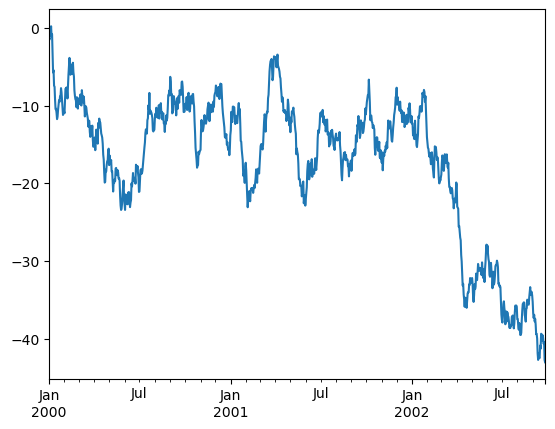

In [60]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

<Figure size 640x480 with 0 Axes>

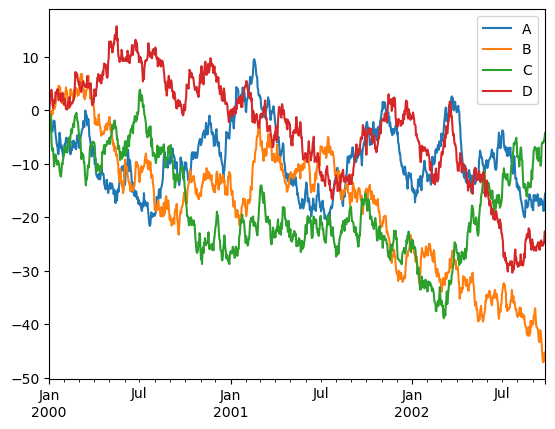

In [61]:
import matplotlib.pyplot as plt

pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
pdf = pdf.cumsum()
plt.figure(); pdf.plot(); plt.legend(loc='best')

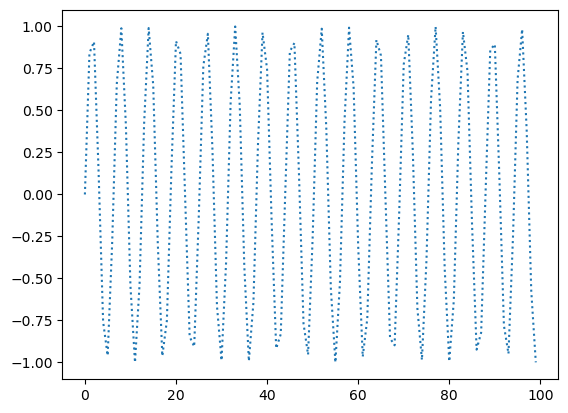